**<h1><center>Bilal FAYE - 2023</center></h1>**

# **GPT2Model**

In [ ]:
# Import tokenizer and model
from transformers import GPT2Tokenizer, GPT2Model

In [ ]:
# Load the pre-trained model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2Model.from_pretrained("gpt2")

In [ ]:
# Test the tokenizer
text = "I play football."
tokens1 = tokenizer(text)
tokens2 = tokenizer.encode(text)
tokens3 = tokenizer.batch_encode_plus([text])
print(f"Tokens 1: {tokens1}\n")
print(f"Tokens 2: {tokens2}\n")
print(f"Tokens 3: {tokens3}\n")
print(f"The token of id: {tokens1['input_ids'][0]} is {tokenizer.decode(tokens1['input_ids'][0])}")

Tokens 1: {'input_ids': [40, 711, 4346, 13], 'attention_mask': [1, 1, 1, 1]}

Tokens 2: [40, 711, 4346, 13]

Tokens 3: {'input_ids': [[40, 711, 4346, 13]], 'attention_mask': [[1, 1, 1, 1]]}

The token of id: 40 is I


In [ ]:
# Test the tokenizer adding padding (tensorflow)
tokenizer.pad_token = tokenizer.eos_token # add this line to specify the padding token
text = ["I play football", "I go to school."]
tokens1 = tokenizer(text, return_tensors='tf', padding='max_length', max_length=10, truncation=True)
# tokens2 = tokenizer.encode(text, return_tensors='tf', padding='max_length', max_length=10, truncation=True) not work for lists
tokens3 = tokenizer.batch_encode_plus(text, return_tensors='tf', padding='max_length', max_length=10, truncation=True)
print(f"Tokens 1: {tokens1}\n")
# print(f"Tokens 2: {tokens2}\n")
print(f"Tokens 3: {tokens3}\n")

Tokens 1: {'input_ids': <tf.Tensor: shape=(2, 10), dtype=int32, numpy=
array([[   40,   711,  4346, 50256, 50256, 50256, 50256, 50256, 50256,
        50256],
       [   40,   467,   284,  1524,    13, 50256, 50256, 50256, 50256,
        50256]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 10), dtype=int32, numpy=
array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]], dtype=int32)>}

Tokens 3: {'input_ids': <tf.Tensor: shape=(2, 10), dtype=int32, numpy=
array([[   40,   711,  4346, 50256, 50256, 50256, 50256, 50256, 50256,
        50256],
       [   40,   467,   284,  1524,    13, 50256, 50256, 50256, 50256,
        50256]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 10), dtype=int32, numpy=
array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]], dtype=int32)>}



In [ ]:
# Test the tokenizer adding padding (pytorch)
tokenizer.pad_token = tokenizer.eos_token # add this line to specify the padding token
text = ["I play football", "I go to school."]
tokens1 = tokenizer(text, return_tensors='pt', padding='max_length', max_length=10, truncation=True)
# tokens2 = tokenizer.encode(text, return_tensors='pt', padding='max_length', max_length=10, truncation=True) not work for lists
tokens3 = tokenizer.batch_encode_plus(text, return_tensors='pt', padding='max_length', max_length=10, truncation=True)
print(f"Tokens 1: {tokens1}\n")
# print(f"Tokens 2: {tokens2}\n")
print(f"Tokens 3: {tokens3}\n")

Tokens 1: {'input_ids': tensor([[   40,   711,  4346, 50256, 50256, 50256, 50256, 50256, 50256, 50256],
        [   40,   467,   284,  1524,    13, 50256, 50256, 50256, 50256, 50256]]), 'attention_mask': tensor([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]])}

Tokens 3: {'input_ids': tensor([[   40,   711,  4346, 50256, 50256, 50256, 50256, 50256, 50256, 50256],
        [   40,   467,   284,  1524,    13, 50256, 50256, 50256, 50256, 50256]]), 'attention_mask': tensor([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]])}



In [ ]:
# See model's output
outputs1 = model(input_ids=tokens3["input_ids"])
outputs2 = model(input_ids=tokens3["input_ids"], attention_mask=tokens3["attention_mask"])
outputs3 = model(**tokens3)
print(f"Outputs 1: {outputs1.keys()}\n")
print(f"Outputs 2: {outputs2.keys()}\n")
print(f"Outputs 3: {outputs3.keys()}\n")

Outputs 1: odict_keys(['last_hidden_state', 'past_key_values'])

Outputs 2: odict_keys(['last_hidden_state', 'past_key_values'])

Outputs 3: odict_keys(['last_hidden_state', 'past_key_values'])



In [ ]:
# last_hidden_state : last block's output
outputs1.last_hidden_state.shape

torch.Size([2, 10, 768])

In [ ]:
# past_key_values: key and value of each block: 12 blocks -> tuple (key, value)
len(outputs1.past_key_values)

12

**Fine-tune GPT2Model for classification task with pytorch**

In [ ]:
# Import
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
import torch.nn.functional as F

In [ ]:
# Example data
reviews = [
    "It was amazing!",
    "I absolutely hated it.",
    "It's quite average.",
    "Fantastic experience!",
    "Terrible service.",
    "Not bad, but could be better.",
    "I loved every moment!",
    "Awful product, don't buy.",
    "It's okay, nothing special.",
    "Incredible performance!",
    "Disappointing outcome.",
    "So-so, not impressed."
]

# Labels
labels = [2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1]  # 2 for positive, 0 for negative, 1 for neutral

In [ ]:
# Tokenize with batch_encode_plus
tokenizer.pad_token = tokenizer.eos_token
encoding = tokenizer.batch_encode_plus(reviews, return_tensors='pt', padding='max_length', max_length=10, truncation=True)
encoding

{'input_ids': tensor([[ 1026,   373,  4998,     0, 50256, 50256, 50256, 50256, 50256, 50256],
        [   40,  5543, 16563,   340,    13, 50256, 50256, 50256, 50256, 50256],
        [ 1026,   338,  2407,  2811,    13, 50256, 50256, 50256, 50256, 50256],
        [   37,   415,  3477,  1998,     0, 50256, 50256, 50256, 50256, 50256],
        [15156,  5547,  2139,    13, 50256, 50256, 50256, 50256, 50256, 50256],
        [ 3673,  2089,    11,   475,   714,   307,  1365,    13, 50256, 50256],
        [   40,  6151,   790,  2589,     0, 50256, 50256, 50256, 50256, 50256],
        [23155,   913,  1720,    11,   836,   470,  2822,    13, 50256, 50256],
        [ 1026,   338,  8788,    11,  2147,  2041,    13, 50256, 50256, 50256],
        [25517, 26260,  2854,     0, 50256, 50256, 50256, 50256, 50256, 50256],
        [ 7279,  1324,  1563,   278,  8055,    13, 50256, 50256, 50256, 50256],
        [ 2396,    12,   568,    11,   407, 12617,    13, 50256, 50256, 50256]]), 'attention_mask': tensor

In [ ]:
# Create a DataLoader
class CustomDataset(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'labels': torch.tensor(self.labels[idx])
        }

# Create Dataset Instance
dataset = CustomDataset(encoding['input_ids'], encoding['attention_mask'], labels)

# Create the DataLoader
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
# GPT-2 for classification
class CustomGPT2Classifier(nn.Module):
    def __init__(self, gpt2_model, num_labels):
        super(CustomGPT2Classifier, self).__init__()
        self.gpt2 = gpt2_model
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask=None):
        gpt2_outputs = self.gpt2(input_ids, attention_mask=attention_mask)
        last_hidden_state = gpt2_outputs.last_hidden_state
        pooled_output = torch.mean(last_hidden_state, dim=1)  # sequence's mean
        logits = self.classifier(pooled_output)
        # Apply softmax
        probs = F.softmax(logits, dim=1)
        return probs

In [ ]:
# Create the model
num_labels = 3
gpt_model = GPT2Model.from_pretrained('gpt2')

# Freeze gpt
for parameter in gpt_model.parameters():
  parameter.requires_grad = False

classifier_model = CustomGPT2Classifier(gpt_model, num_labels)

# Training parameters
epochs = 1
learning_rate = 5e-5
optimizer = AdamW(classifier_model.parameters(), lr=learning_rate)

# Loss (CrossEntropyLoss for classification)
criterion = nn.CrossEntropyLoss()


In [ ]:
# Training
classifier_model.train()
for epoch in range(epochs):
    for batch in dataloader:

        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        optimizer.zero_grad()
        logits = classifier_model(input_ids, attention_mask=attention_mask)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

In [ ]:
# Save the weights of trained model
torch.save(classifier_model.state_dict(), "classifier_model.pt")

In [ ]:
# Load model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

gpt2_model = GPT2Model.from_pretrained('gpt2')

num_labels = 3
classifier_model = CustomGPT2Classifier(gpt2_model, num_labels)

classifier_model.load_state_dict(torch.load("classifier_model.pt"))

<All keys matched successfully>

In [ ]:
# Inference
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token
test = tokenizer.batch_encode_plus(["I love this."], return_tensors='pt', padding='max_length', max_length=50, truncation=True)
classifier_model.eval()
with torch.no_grad():
  output = classifier_model(input_ids=test["input_ids"], attention_mask=test["attention_mask"])

print(f"Predictions: {output}")
print(f"Class: {output.argmax(-1).item()}")

Predictions: tensor([[2.7371e-05, 1.0693e-01, 8.9304e-01]])
Class: 2


# **GPT2LMHeadModel**

In [ ]:
# Import model and tokenizer
from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [ ]:
# See model's output
model = GPT2LMHeadModel.from_pretrained("gpt2")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
texts = ["I play football", "I go to school."]
tokens = tokenizer.batch_encode_plus(texts, return_tensors='pt', padding='max_length', max_length=10, truncation=True)
outputs = model(**tokens)
print(f"Ouput: {outputs.keys()}")

Ouput: odict_keys(['logits', 'past_key_values'])


In [ ]:
# See the logits
outputs.logits.shape

torch.Size([2, 10, 50257])

In [ ]:
# Generator
prompt = "Artificial Intelligence is"

input_ids = tokenizer.encode(prompt, return_tensors="pt")

output = model.generate(input_ids, max_new_tokens=100, do_sample=True, temperature=0.8, pad_token_id=model.config.eos_token_id)

decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)

print(decoded_output)

Artificial Intelligence is already on the horizon. Companies like Microsoft and Tencent have tried to build the next generation of artificial intelligence, but the tools aren't there yet.


**GPT2LMHeadModel for Question Answering**

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW

In [ ]:
# Load pre-trained GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token
model = GPT2LMHeadModel.from_pretrained('gpt2')

In [ ]:
# Sample dialogue dataset
questions = [
    "Hi, how are you?",
    "What's your favorite color?"
]

answers = [
    "I'm good, thanks!",
    "I don't have one. What's yours?",
]

In [ ]:
# Tokenize and pad the dataset using batch_encode_plus
tokenized_inputs = tokenizer.batch_encode_plus(questions, return_tensors='pt', padding='max_length', max_length=10)["input_ids"]
tokenized_labels = tokenizer.batch_encode_plus(answers, return_tensors='pt', padding='max_length', max_length=10)["input_ids"]

In [ ]:
# Make custom dataset
class CustomDataset(Dataset):
    def __init__(self, input_ids, labels):
        self.input_ids = input_ids
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.labels[idx]

dataset = CustomDataset(tokenized_inputs, tokenized_labels)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
# Training parameters
epochs = 1
learning_rate = 5e-5

# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(dataloader) * epochs
# Adjust learning rate during training for example
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training loop
for epoch in range(epochs):
    for batch in dataloader:
        optimizer.zero_grad()
        input_ids, labels = batch

        outputs = model(input_ids, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()

# Save the fine-tuned model
model.save_pretrained("chatbot_model")
tokenizer.save_pretrained("chatbot_model")


('chatbot_model/tokenizer_config.json',
 'chatbot_model/special_tokens_map.json',
 'chatbot_model/vocab.json',
 'chatbot_model/merges.txt',
 'chatbot_model/added_tokens.json')

In [ ]:
# Load the trained chatbot
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Replace 'path/to/your/model' with the actual path where you saved your fine-tuned model
model_path = 'chatbot_model'
# Load the fine-tuned GPT-2 model
model = GPT2LMHeadModel.from_pretrained(model_path)
# Load the tokenizer associated with the model
tokenizer = GPT2Tokenizer.from_pretrained(model_path)

In [ ]:
# Input prompt for generation
prompt = "What is Artificial Intelligence?"

# Tokenize the prompt
input_ids = tokenizer.encode(prompt, return_tensors="pt")

# Generate text
output = model.generate(input_ids, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50, top_p=0.95, pad_token_id=tokenizer.pad_token_id, eos_token_id=tokenizer.eos_token_id, do_sample=True)

# Decode and print the generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
generated_text

"What is Artificial Intelligence?\n\nThe main question facing the artificial intelligence industry is what to do to keep it from being hijacked by other tech companies.\n. I have been around since the 1980s, so there are some really interesting companies you can use to help. (It's best not to take any chances!)\n (There are several different ways of using your skills, in the same way I didn't list a few more here."

In [ ]:
output.shape

torch.Size([1, 90])

# **GPT2LMHeadModel in tensorflow for QA task**

In [ ]:
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer
import json
import numpy as np
import tensorflow as tf


In [ ]:
# Load model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = TFGPT2LMHeadModel.from_pretrained('gpt2')

In [ ]:
model.summary()

Model: "tfgpt2lm_head_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (TFGPT2MainLay  multiple                  124439808 
 er)                                                             
                                                                 
Total params: 124439808 (474.70 MB)
Trainable params: 124439808 (474.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Load the data
with open('intents.json') as file:
    data = json.load(file)
items = []
for intent in data['intents']:
    for patterns in intent['patterns']:
        for responses in intent['responses']:
            items.append((patterns, responses))

items[:10]

[('Hi there', 'Hello, thanks for asking'),
 ('Hi there', 'Good to see you again'),
 ('Hi there', 'Hi there, how can I help?'),
 ('How are you', 'Hello, thanks for asking'),
 ('How are you', 'Good to see you again'),
 ('How are you', 'Hi there, how can I help?'),
 ('Is anyone there?', 'Hello, thanks for asking'),
 ('Is anyone there?', 'Good to see you again'),
 ('Is anyone there?', 'Hi there, how can I help?'),
 ('Hey', 'Hello, thanks for asking')]

In [ ]:
# Create question list as input_ids and answer list as output_ids
input_ids = []
output_ids = []
for item in items:
    input_ids.append(item[0])
    output_ids.append(item[1])


In [ ]:
input_ids[:10]

['Hi there',
 'Hi there',
 'Hi there',
 'How are you',
 'How are you',
 'How are you',
 'Is anyone there?',
 'Is anyone there?',
 'Is anyone there?',
 'Hey']

In [ ]:
output_ids[:10]

['Hello, thanks for asking',
 'Good to see you again',
 'Hi there, how can I help?',
 'Hello, thanks for asking',
 'Good to see you again',
 'Hi there, how can I help?',
 'Hello, thanks for asking',
 'Good to see you again',
 'Hi there, how can I help?',
 'Hello, thanks for asking']

In [ ]:
tokenizer.pad_token = tokenizer.eos_token
input_ids = tokenizer.batch_encode_plus(input_ids, return_tensors='tf', padding='max_length', max_length=20)["input_ids"]
output_ids = tokenizer.batch_encode_plus(output_ids, return_tensors='tf', padding='max_length', max_length=20)["input_ids"]

In [ ]:
input_ids

<tf.Tensor: shape=(91, 20), dtype=int32, numpy=
array([[17250,   612, 50256, ..., 50256, 50256, 50256],
       [17250,   612, 50256, ..., 50256, 50256, 50256],
       [17250,   612, 50256, ..., 50256, 50256, 50256],
       ...,
       [   40,   765,   284, ..., 50256, 50256, 50256],
       [   39,  3531, 35847, ..., 50256, 50256, 50256],
       [15784,   510,  4436, ..., 50256, 50256, 50256]], dtype=int32)>

In [ ]:
output_ids

<tf.Tensor: shape=(91, 20), dtype=int32, numpy=
array([[15496,    11,  5176, ..., 50256, 50256, 50256],
       [10248,   284,   766, ..., 50256, 50256, 50256],
       [17250,   612,    11, ..., 50256, 50256, 50256],
       ...,
       [ 5492,  2148,  4436, ..., 50256, 50256, 50256],
       [ 5492,  2148,  4436, ..., 50256, 50256, 50256],
       [ 5492,  2148,  4436, ..., 50256, 50256, 50256]], dtype=int32)>

In [ ]:
# Create a Data Generator
class CustomDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, input_ids, output_ids, batch_size, shuffle=True):
        self.input_ids = input_ids
        self.output_ids = output_ids
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(len(input_ids))
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __len__(self):
        return int(np.ceil(len(self.input_ids) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_input_ids = self.input_ids[batch_indices]
        batch_output_ids = self.output_ids[batch_indices]

        return (batch_input_ids, batch_output_ids)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

data_generator = CustomDataGenerator(input_ids, output_ids, 16)

In [ ]:
# Define training parameters
num_epochs = 1
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
learning_rate = tf.keras.optimizers.schedules.PolynomialDecay(
    5e-4,
    decay_steps=len(data_generator) * num_epochs,
    end_learning_rate=0.0,
)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    loss=loss,
    weighted_metrics=["accuracy"],
)

In [ ]:
# Train model
model.fit(input_ids, output_ids, batch_size=16, epochs=num_epochs)

# save the model
model.save_pretrained('chatbot_model')

6/6 [==============================] - 87s 8s/step - loss: 5.2555 - accuracy: 0.5077


In [ ]:
# Load the saved model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2", padding_side="left")
#model = TFGPT2LMHeadModel.from_pretrained("chatbot_model")
tokenizer.pad_token = tokenizer.eos_token

In [ ]:
# Create the bot
def test():
    while True:
        input_text = input("User: ")
        input_ids = tokenizer.batch_encode_plus([input_text], return_tensors='tf', padding='max_length', max_length=20)["input_ids"]

        # Calculate the maximum length for generation based on the length of input_ids


        output_ids = model.generate(input_ids, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50, top_p=0.95, pad_token_id=tokenizer.pad_token_id, eos_token_id=tokenizer.eos_token_id, do_sample=True)


        output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
        print("Bot:", output_text)

In [ ]:
test()

User: what is football?
Bot: what is football?

Football is the game of football, a game that players play as a team. Football has a certain level of respectability that makes you feel respected. In sports, however, football is not as easy to play when your team is on the offensive. It is a physical affair, and it can be difficult to have a positive reaction to it. Players are always playing with their bodies or in


KeyboardInterrupt: ignored

# **Fine-tuning GPT-2 with KerasNLP is the easiest way**

In [ ]:
# Install keras 3
! pip install keras --upgrade

In [ ]:
# Install keras for nlp and keras for cv
!pip install keras-cv
!pip install keras-nlp

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "jax"  # or "tensorflow" or "torch"
import keras_nlp
import tensorflow as tf
import keras_core as keras
import time

Using JAX backend.


In [ ]:
# Load GPT and tokienizer
preprocessor = keras_nlp.models.GPT2CausalLMPreprocessor.from_preset(
    "gpt2_base_en",
    sequence_length=128,
)
gpt2_lm = keras_nlp.models.GPT2CausalLM.from_preset(
    "gpt2_base_en", preprocessor=preprocessor
)

1042301/1042301 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
456318/456318 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
497986112/497986112 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [ ]:
gpt2_lm.summary()

Preprocessor: "gpt2_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gpt2_tokenizer (GPT2Tokenizer)                     │                                              50,257 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gpt2_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃     Param # ┃ Connected to                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │           0 │ -                              │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │           0 │ -                              │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ gpt2_backbone (GPT2Backbone)  │ (None, None, 768)         │ 124,439,808 │ padding_mask[0][0],            │
│                               │                           │             │ token_ids[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ token_embedding               │ (None, None, 50257)       │  38,597,376 │ gpt2_backbone[0][0]            │
│ (ReversibleEmbedding)         │                           │             │                                │
└───────────────────────────────┴───────────────────────────┴─────────────┴────────────────────────────────┘

 Total params: 124,439,808 (474.70 MB)

 Trainable params: 124,439,808 (474.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Backbone decoder
backbone_decoder = keras_nlp.models.GPT2Backbone.from_preset("gpt2_base_en")
backbone_decoder.summary()

Model: "gpt2_backbone_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃    Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ token_ids (InputLayer)    │ (None, None)           │          0 │ -                          │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ token_embedding           │ (None, None, 768)      │ 38,597,376 │ token_ids[0][0]            │
│ (ReversibleEmbedding)     │                        │            │                            │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ position_embedding        │ (None, None, 768)      │    786,432 │ token_embedding[0][0]      │
│ (PositionEmbedding)       │                        │            │                            │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ embeddings_add (Add)      │ (None, None, 768)      │          0 │ token_embedding[0][0],     │
│                           │                        │            │ position_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ embeddings_dropout        │ (None, None, 768)      │          0 │ embeddings_add[0][0]       │
│ (Dropout)                 │                        │            │                            │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ padding_mask (InputLayer) │ (None, None)           │          0 │ -                          │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ transformer_layer_0       │ (None, None, 768)      │  7,087,872 │ embeddings_dropout[0][0],  │
│ (TransformerDecoder)      │                        │            │ padding_mask[0][0]         │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ transformer_layer_1       │ (None, None, 768)      │  7,087,872 │ transformer_layer_0[0][0], │
│ (TransformerDecoder)      │                        │            │ padding_mask[0][0]         │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ transformer_layer_2       │ (None, None, 768)      │  7,087,872 │ transformer_layer_1[0][0], │
│ (TransformerDecoder)      │                        │            │ padding_mask[0][0]         │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ transformer_layer_3       │ (None, None, 768)      │  7,087,872 │ transformer_layer_2[0][0], │
│ (TransformerDecoder)      │                        │            │ padding_mask[0][0]         │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ transformer_layer_4       │ (None, None, 768)      │  7,087,872 │ transformer_layer_3[0][0], │
│ (TransformerDecoder)      │                        │            │ padding_mask[0][0]         │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ transformer_layer_5       │ (None, None, 768)      │  7,087,872 │ transformer_layer_4[0][0], │
│ (TransformerDecoder)      │                        │            │ padding_mask[0][0]         │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ transformer_layer_6       │ (None, None, 768)      │  7,087,872 │ transformer_layer_5[0][0], │
│ (TransformerDecoder)      │                        │            │ padding_mask[0][0]         │
├───────────────────────────┼────────────────────────┼────────────┼────────────────────────────┤
│ transformer_layer_7       │ (None, None, 768)      │  7,087,872 │ transformer_layer_6[0][0], │
│ (TransformerDecoder) 

 Total params: 124,439,808 (474.70 MB)

 Trainable params: 124,439,808 (474.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Generate a text
output = gpt2_lm.generate("The goal of apple company is ", max_length=200)
print("\nGPT-2 output:")
print(output)


GPT-2 output:
The goal of apple company is  to create a better apple.  It is a product that is a good quality apple, but also an apple that is a good quality apple.  Apple is a natural product, and apple is a product that you need to get to know and enjoy.  The apple is a good apple that you should be able to eat.  If you are not sure about the quality of apple, then you are not a good apple, so you should be a good apple.  Apple products are good for you.  They make you feel good and you will enjoy them.  The more you enjoy a product, the better it will feel.  It makes you feel good, so you should like it.  The best apple products are good for your health, and the best apple products are good for your health.  So, you should try to find the best apple products.  It is important


In [ ]:
# Load data
import tensorflow_datasets as tfds
reddit_ds = tfds.load("reddit_tifu", split="train", as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/79740 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/reddit_tifu/short/1.1.2.incompleteRQF73V/reddit_tifu-train.tfrecord*...:  …

Dataset reddit_tifu downloaded and prepared to /root/tensorflow_datasets/reddit_tifu/short/1.1.2. Subsequent calls will reuse this data.


In [ ]:
reddit_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [ ]:
# See the document and title
for document, title in reddit_ds:
    print(document.numpy())
    print(title.numpy())
    break

b"me and a friend decided to go to the beach last sunday. we loaded up and headed out. we were about half way there when i decided that i was not leaving till i had seafood. \n\nnow i'm not talking about red lobster. no friends i'm talking about a low country boil. i found the restaurant and got directions. i don't know if any of you have heard about the crab shack on tybee island but let me tell you it's worth it. \n\nwe arrived and was seated quickly. we decided to get a seafood sampler for two and split it. the waitress bought it out on separate platters for us. the amount of food was staggering. two types of crab, shrimp, mussels, crawfish, andouille sausage, red potatoes, and corn on the cob. i managed to finish it and some of my friends crawfish and mussels. it was a day to be a fat ass. we finished paid for our food and headed to the beach. \n\nfunny thing about seafood. it runs through me faster than a kenyan \n\nwe arrived and walked around a bit. it was about 45min since we a

In [ ]:
# Make data into batch
train_ds = (
    reddit_ds.map(lambda document, _: document)
    .batch(32)
    .cache()
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
train_ds = train_ds.take(500)
num_epochs = 1

# Linearly decaying learning rate.
learning_rate = keras.optimizers.schedules.PolynomialDecay(
    5e-5,
    decay_steps=train_ds.cardinality() * num_epochs,
    end_learning_rate=0.0,
)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
gpt2_lm.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=loss,
    weighted_metrics=["accuracy"],
)

gpt2_lm.fit(train_ds, epochs=num_epochs)

In [ ]:
# SEARCH FOR TOP-K
# Top-k Sampling: This strategy involves sampling from the top-k most likely next tokens, where k is a hyperparameter. It introduces randomness while still constraining the possibilities.
gpt2_lm.compile(sampler="top_k")
output = gpt2_lm.generate("I like basketball", max_length=200)
print("\nGPT-2 output:")
print(output)

# Greedy Sampling: This strategy selects the token with the highest predicted probability as the next token. It tends to produce coherent but sometimes repetitive text.
greedy_sampler = keras_nlp.samplers.GreedySampler()
gpt2_lm.compile(sampler=greedy_sampler)
output = gpt2_lm.generate("I like basketball", max_length=200)
print("\nGPT-2 output:")
print(output)


GPT-2 output:
I like basketball, but I'm a big fan of the game, too. I'm a big believer in the game. I love the game. I'm a big believer in the game's culture. I love the game and I love the culture. It's a great way to get out and have fun, but it can be a lot more fun if you're not doing the things that we all do in the NBA. And I know it will be fun for us to have a great time, but we'll see what it's like. I think we'll get there. I'm not going into it in the wrong way. I'm going into it in the right way.

What do you think about the Lakers' new coach?

We have a lot of young guys that want to play, but we don't have a lot of young guys that can play. I think they're ready, we're going to get them. I think we have a lot of

GPT-2 output:
I like basketball. I like to play it. I like to watch it. I like to watch it. I like to watch it. I like to watch it. I like to watch it. I like to watch it. I like to watch it. I like to watch it. I like to watch it. I like to watch it. I like to

In [ ]:
help(gpt2_lm)

Help on GPT2CausalLM in module keras_nlp.src.models.gpt2.gpt2_causal_lm object:

class GPT2CausalLM(keras_nlp.src.models.generative_task.GenerativeTask)
 |  GPT2CausalLM(backbone, preprocessor=None, **kwargs)
 |  
 |  An end-to-end GPT2 model for causal language modeling.
 |  
 |  A causal language model (LM) predicts the next token based on previous
 |  tokens. This task setup can be used to train the model unsupervised on
 |  plain text input, or to autoregressively generate plain text similar to
 |  the data used for training. This task can be used for pre-training or
 |  fine-tuning a GPT-2 model, simply by calling `fit()`.
 |  
 |  This model has a `generate()` method, which generates text based on a
 |  prompt. The generation strategy used is controlled by an additional
 |  `sampler` argument on `compile()`. You can recompile the model with
 |  different `keras_nlp.samplers` objects to control the generation. By
 |  default, `"top_k"` sampling will be used.
 |  
 |  This model ca

**NB: We can use the same to train the model in an other language**

# **LoRA: Low-Rank Adaptation**

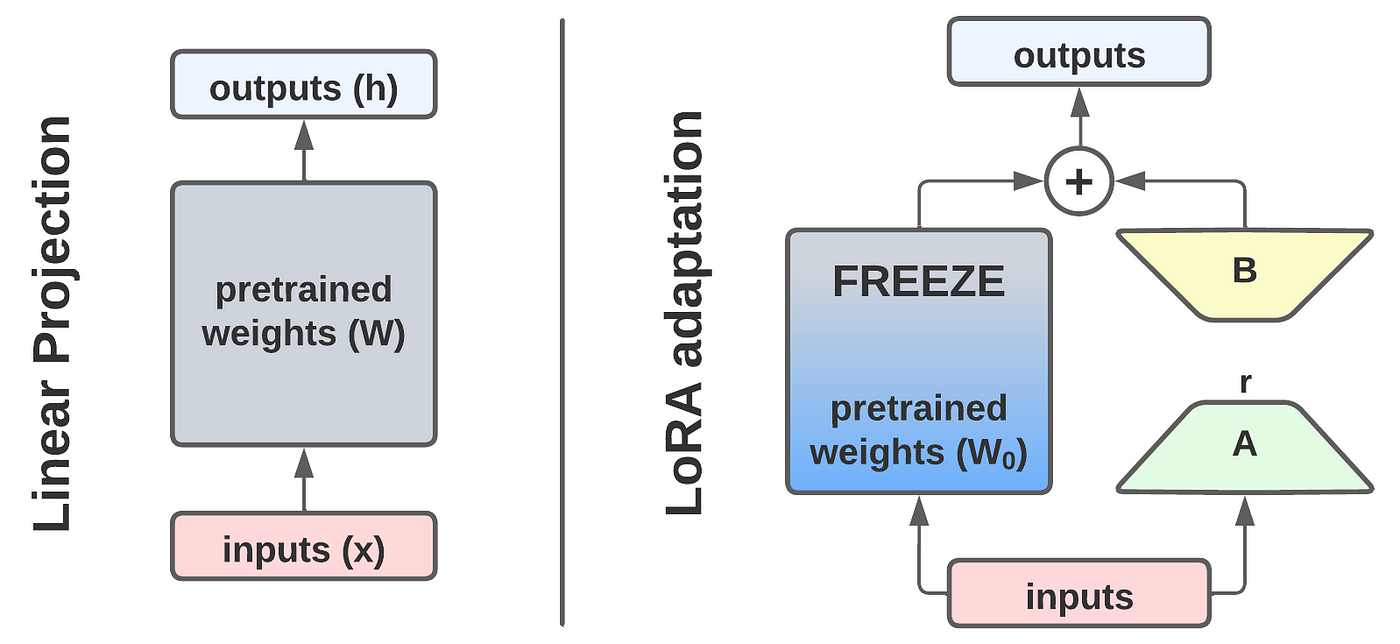

Le Low-Rank Adaptation (LoRA) fonctionne en exploitant la structure sous-jacente des matrices de poids dans un modèle, généralement des modèles de langage tels que les transformers. Voici quelques détails techniques et raisons pour lesquelles cela peut être efficace :

**Approximation de Faible Rang :** LoRA repose sur l'idée que les matrices de poids des modèles peuvent souvent être approximées par des matrices de rang inférieur sans perdre significativement en capacité de représentation. Cela signifie qu'une grande partie de l'information est contenue dans un sous-espace de dimension réduite.

**Réduction de la Dimensionnalité :** En réduisant la dimensionnalité des matrices de poids, on réduit le nombre de paramètres à ajuster lors du fine-tuning. Cela a un impact positif sur les ressources computationnelles nécessaires pour la mise à jour des poids du modèle.

**Accélérer le Fine-Tuning :** En limitant le nombre de paramètres à ajuster, LoRA accélère le processus de fine-tuning, ce qui est particulièrement important dans des scénarios où le coût computationnel est un facteur limitant.

**Régularisation Naturelle :** L'approximation à faible rang peut agir comme une forme de régularisation, aidant à prévenir le surajustement (overfitting) aux données d'entraînement. Cela peut être particulièrement utile lorsque les données de fine-tuning sont limitées.

**Transférabilité des Connaissances :** LoRA permet de transférer plus efficacement les connaissances acquises pendant l'entraînement initial du modèle vers la tâche spécifique de fine-tuning, car une grande partie de la structure sous-jacente est préservée.

In [ ]:
import math


class LoraLayer(keras.layers.Layer):
    def __init__(
        self,
        original_layer,
        rank=8,
        alpha=32,
        trainable=False,
        **kwargs,
    ):
        # We want to keep the name of this layer the same as the original
        # dense layer.
        original_layer_config = original_layer.get_config()
        name = original_layer_config["name"]

        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.rank = rank
        self.alpha = alpha

        self._scale = alpha / rank

        self._num_heads = original_layer_config["output_shape"][-2]
        self._hidden_dim = self._num_heads * original_layer_config["output_shape"][-1]

        # Layers.

        # Original dense layer.
        self.original_layer = original_layer
        # No matter whether we are training the model or are in inference mode,
        # this layer should be frozen.
        self.original_layer.trainable = False

        # LoRA dense layers.
        self.A = keras.layers.Dense(
            units=rank,
            use_bias=False,
            # Note: the original paper mentions that normal distribution was
            # used for initialization. However, the official LoRA implementation
            # uses "Kaiming/He Initialization".
            kernel_initializer=keras.initializers.VarianceScaling(
                scale=math.sqrt(5), mode="fan_in", distribution="uniform"
            ),
            trainable=trainable,
            name=f"lora_A",
        )
        # B has the same `equation` and `output_shape` as the original layer.
        # `equation = abc,cde->abde`, where `a`: batch size, `b`: sequence
        # length, `c`: `hidden_dim`, `d`: `num_heads`,
        # `e`: `hidden_dim//num_heads`. The only difference is that in layer `B`,
        # `c` represents `rank`.
        self.B = keras.layers.EinsumDense(
            equation=original_layer_config["equation"],
            output_shape=original_layer_config["output_shape"],
            kernel_initializer="zeros",
            trainable=trainable,
            name=f"lora_B",
        )

    def call(self, inputs):
        original_output = self.original_layer(inputs)
        if self.trainable:
            # If we are fine-tuning the model, we will add LoRA layers' output
            # to the original layer's output.
            lora_output = self.B(self.A(inputs)) * self._scale
            return original_output + lora_output

        # If we are in inference mode, we "merge" the LoRA layers' weights into
        # the original layer's weights - more on this in the text generation
        # section!
        return original_output

In [ ]:
# Load the original model.
preprocessor = keras_nlp.models.GPT2CausalLMPreprocessor.from_preset(
    "gpt2_base_en",
    sequence_length=128,
)
lora_model = keras_nlp.models.GPT2CausalLM.from_preset(
    "gpt2_base_en",
    preprocessor=preprocessor,
)

In [ ]:
for layer_idx in range(lora_model.backbone.num_layers):
    # Change query dense layer.
    decoder_layer = lora_model.backbone.get_layer(f"transformer_layer_{layer_idx}")
    self_attention_layer = decoder_layer._self_attention_layer
    # Allow mutation to Keras layer state.
    self_attention_layer._tracker.locked = False

    # Change query dense layer.
    self_attention_layer._query_dense = LoraLayer(
        self_attention_layer._query_dense,
        rank=RANK,
        alpha=ALPHA,
        trainable=True,
    )

    # Change value dense layer.
    self_attention_layer._value_dense = LoraLayer(
        self_attention_layer._value_dense,
        rank=RANK,
        alpha=ALPHA,
        trainable=True,
    )

In [ ]:
# Test the model
lora_model(preprocessor(["LoRA is very useful for quick LLM finetuning"])[0])
pass

In [ ]:
for layer in lora_model._flatten_layers():
    lst_of_sublayers = list(layer._flatten_layers())

    if len(lst_of_sublayers) == 1:  # "leaves of the model"
        if layer.name in ["lora_A", "lora_B"]:
            layer.trainable = True
        else:
            layer.trainable = False

In [ ]:
lora_model.summary()

In [ ]:
gpu_memory_callback = GPUMemoryCallback(
    target_batches=[5, 10, 25, 50, 100, 150, 200, 300, 400, 500],
    print_stats=True,
)

optimizer, loss = get_optimizer_and_loss()

lora_model.compile(
    optimizer=optimizer,
    loss=loss,
    weighted_metrics=["accuracy"],
)

lora_model.fit(
    train_ds,
    epochs=EPOCHS,
    callbacks=[gpu_memory_callback],
)
lora_model_memory_usage = gpu_memory_callback.memory_usage

In [ ]:
plt.bar(
    ["GPT-2", "LoRA GPT-2"],
    [max(gpt2_lm_memory_usage), max(lora_model_memory_usage)],
    color=["red", "blue"],
)

plt.xlabel("Time")
plt.ylabel("GPU Memory Usage (in GB)")

plt.title("GPU Memory Usage Comparison")
plt.legend()
plt.show()

**Merge weights and generate text!**

One of the biggest advantages of LoRA over other adapter methods is that it does not incur any additional inference latency. Let's understand why.

Recall our LoRA equation: output = W0x + b0 + BAx. We can rewrite this as: output = = Wx + b0 = (W0 + BA)x + b0, where W = W0 + BA. This means that if we merge the weights of the original model and the adapter, we will be essentially doing the same computation as the original model!

In [ ]:
for layer_idx in range(lora_model.backbone.num_layers):
    self_attention_layer = lora_model.backbone.get_layer(
        f"transformer_layer_{layer_idx}"
    )._self_attention_layer

    # Merge query dense layer.
    query_lora_layer = self_attention_layer._query_dense

    A_weights = query_lora_layer.A.kernel  # (768, 1) (a, b)
    B_weights = query_lora_layer.B.kernel  # (1, 12, 64) (b, c, d) 12: num_head and 64: 768//12 = dim/num_head
    increment_weights = tf.einsum("ab,bcd->acd", A_weights, B_weights) * (ALPHA / RANK)
    query_lora_layer.original_layer.kernel.assign_add(increment_weights)

    # Merge value dense layer.
    value_lora_layer = self_attention_layer._value_dense

    A_weights = value_lora_layer.A.kernel  # (768, 1) (a, b)
    B_weights = value_lora_layer.B.kernel  # (1, 12, 64) (b, c, d)
    increment_weights = tf.einsum("ab,bcd->acd", A_weights, B_weights) * (ALPHA / RANK)
    value_lora_layer.original_layer.kernel.assign_add(increment_weights)


In [ ]:
# Freezing weights not necessary during generation since no weights are updated.
generate_text(lora_model, "I like basketball", max_length=MAX_GENERATION_LENGTH)
generate_text(
    lora_model, "The first time", max_length=MAX_GENERATION_LENGTH
)
